In [2]:
from keras.datasets import reuters

(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
len(train_data)

8982

In [4]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [5]:
test_data.shape

(2246,)

In [6]:
# 데이터프레임으로 변경
import pandas as pd

train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

news_df = pd.DataFrame(train_data_df)
news_df.columns = ['train_data']
news_df['train_labels'] = train_labels_df
news_df

,train_data,train_labels
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [7]:
# check null
news_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [8]:
news_df.shape

(8982, 2)

In [9]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    8982 non-null   object
 1   train_labels  8982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.5+ KB


In [10]:
# 토픽의 개수와 각 토픽의 개수 확인
news_df['train_labels'].value_counts().sort_index()

0       55
1      432
2       74
3     3159
4     1949
5       17
6       48
7       16
8      139
9      101
10     124
11     390
12      49
13     172
14      26
15      20
16     444
17      39
18      66
19     549
20     269
21     100
22      15
23      41
24      62
25      92
26      24
27      15
28      48
29      19
30      45
31      39
32      32
33      11
34      50
35      10
36      49
37      19
38      19
39      24
40      36
41      30
42      13
43      21
44      12
45      18
Name: train_labels, dtype: int64

In [11]:
# 단어 리스트 가져오기
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [12]:
# 딕셔너리의 키,값 바꾸기
word_dict = dict([(value, key) for (key,value) in word_index.items()])
word_dict

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [13]:
len(word_dict)

30979

In [14]:
def convert_review(num):
    a = ""
    for i in train_data[num]:
        a = a + word_dict.get(i-3,'?') + " "
    return a
convert_review(106)

"? the european community may decide to increase the cereals co responsibility levy and extend its scope to cover cereal substitutes if the commission's 1987 88 farm price package is opposed by member states ? ? vice president of the british agricultural ? association ? said at the moment the commission is proposing the rate of levy remain unchanged at three pct but ? addressing a feed manufacturers' dinner in ? said this could change if its controversial plans to cut cereal prices and introduce an oils and fats tax are blocked ? said ? would continue to fight the cereals levy ? and ? however a test case in the european court of justice ? the ? of the current regulation applying the levy which is being backed by the ec feed manufacturers' organisation ? was not now expected to be heard until the end of 1987 he said reuter 3 "

## 데이터 준비

In [15]:
import numpy as np

# 10000개의 열을 가지는 벡터를 생성하고, 해당 단어가 존재하면 1
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequence(train_data).astype('float32')

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequence(test_data).astype('float32')

## 딥러닝 모델

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
# 훈련데이터와 검증데이터 나누기
x_val = x_train[:6000].astype(float)
partial_x_train = x_train[6000:].astype(float)

y_val = train_labels[:6000].astype(float)
partial_y_train = train_labels[6000:].astype(float)

In [18]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=200,validation_data=(x_val,y_val))

Epoch 1/20
15/15 [==============================] - 4s 123ms/step - loss: 3.5162 - accuracy: 0.2562 - val_loss: 3.1820 - val_accuracy: 0.3960
Epoch 2/20
15/15 [==============================] - 1s 55ms/step - loss: 2.8648 - accuracy: 0.4433 - val_loss: 2.6306 - val_accuracy: 0.4942
Epoch 3/20
15/15 [==============================] - 1s 53ms/step - loss: 2.3015 - accuracy: 0.5419 - val_loss: 2.2057 - val_accuracy: 0.5447
Epoch 4/20
15/15 [==============================] - 1s 55ms/step - loss: 1.8768 - accuracy: 0.5801 - val_loss: 1.9103 - val_accuracy: 0.5655
Epoch 5/20
15/15 [==============================] - 1s 54ms/step - loss: 1.5615 - accuracy: 0.6244 - val_loss: 1.7032 - val_accuracy: 0.5962
Epoch 6/20
15/15 [==============================] - 1s 64ms/step - loss: 1.3230 - accuracy: 0.6891 - val_loss: 1.5599 - val_accuracy: 0.6378
Epoch 7/20
15/15 [==============================] - 1s 58ms/step - loss: 1.1418 - accuracy: 0.7569 - val_loss: 1.4684 - val_accuracy: 0.6758
Epoch 8/20
1

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

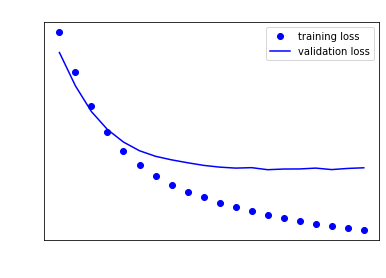

In [20]:
import matplotlib.pyplot as plt

plt.plot(epochs,loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'b',label = 'validation loss')
plt.title('Training and Validation loss',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Loss',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')
plt.show()

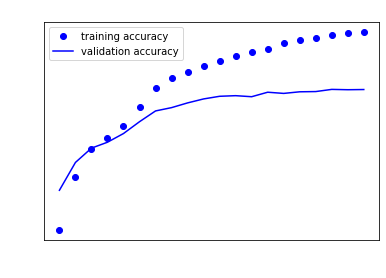

In [21]:
plt.plot(epochs,acc,'bo',label = 'training accuracy')
plt.plot(epochs,val_acc,'b',label = 'validation accuracy')
plt.title('Training and Validation accuracy',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Accuracy',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')

In [22]:
# 모델 삭제
del model

# 모델 재생성
model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# epoch = 40 으로 모델 재 학습
history = model.fit(partial_x_train,partial_y_train,epochs=40,batch_size=200,validation_data=(x_val,y_val))

Epoch 1/40
15/15 [==============================] - 3s 114ms/step - loss: 3.5940 - accuracy: 0.0694 - val_loss: 3.3069 - val_accuracy: 0.1183
Epoch 2/40
15/15 [==============================] - 1s 53ms/step - loss: 3.0384 - accuracy: 0.4608 - val_loss: 2.8022 - val_accuracy: 0.5520
Epoch 3/40
15/15 [==============================] - 1s 51ms/step - loss: 2.5066 - accuracy: 0.6087 - val_loss: 2.3624 - val_accuracy: 0.5978
Epoch 4/40
15/15 [==============================] - 1s 53ms/step - loss: 2.0544 - accuracy: 0.6469 - val_loss: 2.0247 - val_accuracy: 0.6243
Epoch 5/40
15/15 [==============================] - 1s 53ms/step - loss: 1.7012 - accuracy: 0.7002 - val_loss: 1.7728 - val_accuracy: 0.6578
Epoch 6/40
15/15 [==============================] - 1s 55ms/step - loss: 1.4335 - accuracy: 0.7270 - val_loss: 1.6022 - val_accuracy: 0.6720
Epoch 7/40
15/15 [==============================] - 1s 60ms/step - loss: 1.2405 - accuracy: 0.7455 - val_loss: 1.4949 - val_accuracy: 0.6810
Epoch 8/40
1

In [23]:
# 데이터 저장
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

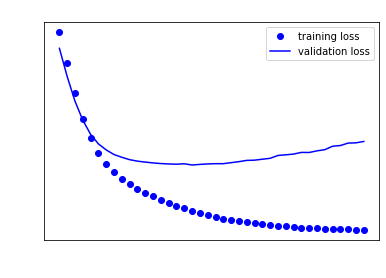

In [24]:
# loss에 대한 시각화
plt.plot(epochs,loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'b',label = 'validation loss')
plt.title('Training and Validation loss',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Loss',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')
plt.show()

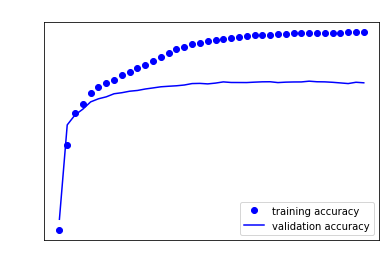

In [25]:
# accuracy에 대한 시각화
plt.plot(epochs,acc,'bo',label = 'training accuracy')
plt.plot(epochs,val_acc,'b',label = 'validation accuracy')
plt.title('Training and Validation accuracy',color = 'white')
plt.xlabel('Epochs',color = 'white')
plt.ylabel('Accuracy',color = 'white')
plt.legend()
plt.tick_params(colors = 'white', color = 'white')

In [26]:
# 모델 삭제
del model

# 모델 재생성
model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# epoch = 40 으로 모델 재 학습
history = model.fit(partial_x_train,partial_y_train,epochs=40,batch_size=200,validation_data=(x_val,y_val))

Epoch 1/40
15/15 [==============================] - 3s 116ms/step - loss: 3.4412 - accuracy: 0.3330 - val_loss: 3.0615 - val_accuracy: 0.3565
Epoch 2/40
15/15 [==============================] - 1s 51ms/step - loss: 2.6839 - accuracy: 0.4534 - val_loss: 2.4317 - val_accuracy: 0.5368
Epoch 3/40
15/15 [==============================] - 1s 54ms/step - loss: 2.0753 - accuracy: 0.5879 - val_loss: 2.0079 - val_accuracy: 0.5840
Epoch 4/40
15/15 [==============================] - 1s 57ms/step - loss: 1.6716 - accuracy: 0.6459 - val_loss: 1.7524 - val_accuracy: 0.6148
Epoch 5/40
15/15 [==============================] - 1s 60ms/step - loss: 1.4036 - accuracy: 0.6881 - val_loss: 1.5928 - val_accuracy: 0.6487
Epoch 6/40
15/15 [==============================] - 1s 53ms/step - loss: 1.2067 - accuracy: 0.7307 - val_loss: 1.4826 - val_accuracy: 0.6697
Epoch 7/40
15/15 [==============================] - 1s 52ms/step - loss: 1.0582 - accuracy: 0.7673 - val_loss: 1.4188 - val_accuracy: 0.6868
Epoch 8/40
1

In [27]:
prediction = model.predict(x_test)

In [28]:
# 첫 번째 기사의 토픽의 결과값을 보여준다.
np.argmax(prediction[0])

3

In [29]:
# 테스트 셋에 대한 성능평가를 확인해볼 수 있다.


2074